In [41]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x = diabetes.data[:,2]
y = diabetes.target

In [42]:
#가중치 w와 절편b를 1.0으로 초기화한다
w =1.0
b =1.0

In [43]:
#초기 가중치와 절편에 독립변수 x의 첫번쨰 값을 넣어서 타킷값과 비교해본다
y_hat = x[0] * w + b
print(y_hat)
print(y[0])

1.0616962065186832
151.0


In [44]:
#가중치를 0.1 증가시켰을떄 종속변수가 증가하는지를 확인한다
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


In [45]:
#가중치를 0.1 증가시켰을때의 증가한 양을 구한다.
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [46]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [47]:
#b절편의 증가분에 따른 종속변수의 변화를 살핀다
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [48]:
#b절편의 변화율을 구한다
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [49]:
#오차 역전파를 통하여 오차와 변화율을 곱하여 가중치를 업데이트한다
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [50]:
#다음 x,y의 오차 역전파를 통하여 가중치를 업데이트한다
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [51]:
#처음부터 끝까지 오차 역전파를 통하여 가중치를 업데이트한값을 구한다
for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w+ w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


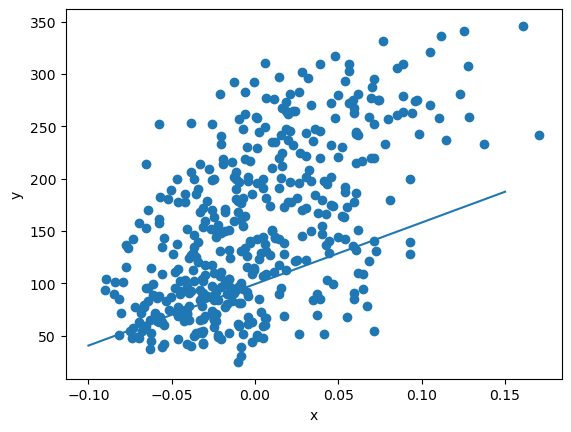

In [55]:
#pt1, pt2의 두점 사이의 그래프를 그린다
import matplotlib.pyplot as plt
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [60]:
#100번의 작업과정(에포크epoch)를 돌면서 직선의 이동을 확인한다
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w,b)

913.5973364346786 123.39414383177173


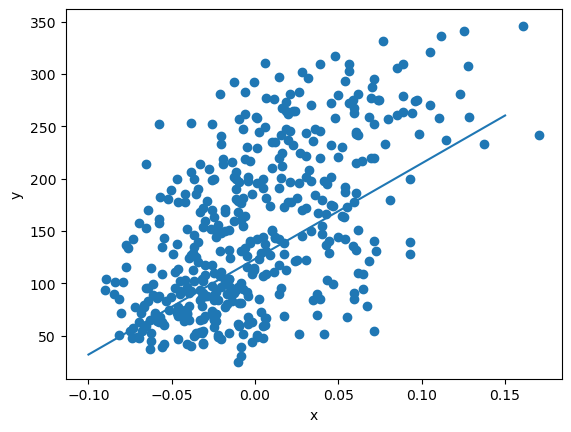

In [62]:
#백번의 epoch를 거쳐서 나온 가중치와 b절편을 이용하여 그래프를 그린다
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [64]:
#새로운 독립변수를 넣어서 종속변수의 값을 확인한다
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


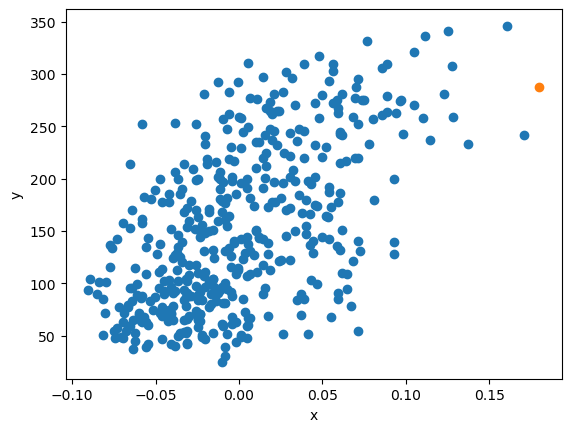

In [66]:
#새로운 값의 위치를 그래프에 그려본다
plt.scatter(x,y)
plt.scatter(x_new,  y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [68]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

In [69]:
err = y_i - y_hat
b = b + 1 * err

In [73]:
#선형 회귀를 위한 뉴런만들기
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    
    #정방향 계산 직선 방정식을 계산 
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    #역방향 계산 오차 역전파를 계산
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
neuron = Neuron()
neuron.fit(x, y)

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()